In [1]:
"""
Master Data Management (MDM) Analysis Project
==============================================
Candidate Contact Deduplication & Data Quality Assessment

Objective: Demonstrate MDM capabilities including data profiling, quality assessment,
entity resolution, and data enrichment for a recruitment database.

Author: Reginaldo da Rosa
Date: December 2025
"""

'\nMaster Data Management (MDM) Analysis Project\n==============================================\nCandidate Contact Deduplication & Data Quality Assessment\n\nObjective: Demonstrate MDM capabilities including data profiling, quality assessment,\nentity resolution, and data enrichment for a recruitment database.\n\nAuthor: Reginaldo da Rosa\nDate: December 2025\n'

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')


# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("=" * 80)
print("MASTER DATA MANAGEMENT ANALYSIS - CONTACT DEDUPLICATION PROJECT")
print("=" * 80)
print()

# ============================================================================
# 1. DATA GENERATION - Simulating Real-world MDM Challenges
# ============================================================================
print("SECTION 1: DATA GENERATION & LOADING")
print("-" * 80)

np.random.seed(42)
# Generate synthetic candidate/contact data with intentional quality issues
def generate_contact_data(n=500):
    """Generate realistic contact data with common MDM issues"""
    
    first_names = ['John', 'Jane', 'Michael', 'Sarah', 'David', 'Emma', 'James', 
                   'Emily', 'Robert', 'Lisa', 'William', 'Jennifer', 'Richard', 'Mary']
    last_names = ['Smith', 'Johnson', 'Williams', 'Brown', 'Jones', 'Garcia', 
                  'Miller', 'Davis', 'Rodriguez', 'Martinez', 'Hernandez', 'Lopez']
    companies = ['TechCorp Ltd', 'FinanceGroup', 'HealthSystems Inc', 'RetailMax', 
                 'ConsultPro', 'DataSolutions', 'GlobalTrade Co', 'InnovateLabs']
    job_titles = ['Software Engineer', 'Data Analyst', 'Project Manager', 
                  'Business Analyst', 'DevOps Engineer', 'QA Engineer', 'Product Manager']
    
    data = []
    contact_id = 1000
    
    for i in range(n):
        first = np.random.choice(first_names)
        last = np.random.choice(last_names)
        
        # Introduce duplicates with variations (20% of records)
        if np.random.random() < 0.2 and i > 0:
            # Create a duplicate with variations
            prev_record = data[np.random.randint(0, len(data))]
            first = prev_record['first_name']
            last = prev_record['last_name']
            
            # Add variations
            if np.random.random() < 0.3:
                first = first.lower()  # Case variation
            if np.random.random() < 0.3:
                last = last + ' '  # Trailing space
        
        # Generate email with variations
        email_base = f"{first.lower()}.{last.lower()}@"
        company = np.random.choice(companies)
        domain = company.lower().replace(' ', '').replace('ltd', '').replace('inc', '').replace('co', '') + '.com'
        email = email_base + domain
        
        # Introduce data quality issues
        if np.random.random() < 0.1:
            email = None  # Missing email
        elif np.random.random() < 0.05:
            email = email.replace('.', '')  # Invalid format
        
        # Generate phone with variations
        phone = f"+44 {''.join([str(np.random.randint(0, 10)) for _ in range(10)])}"
        if np.random.random() < 0.15:
            phone = None  # Missing phone
        elif np.random.random() < 0.1:
            phone = phone.replace('+44 ', '0')  # Format variation
        
        # Generate other fields
        job_title = np.random.choice(job_titles)
        status = np.random.choice(['Active', 'Inactive', 'Prospect', None], p=[0.7, 0.15, 0.1, 0.05])
        
        # Date variations
        created_date = datetime.now() - timedelta(days=np.random.randint(1, 730))
        last_contact = created_date + timedelta(days=np.random.randint(0, 365))
        
        data.append({
            'contact_id': contact_id,
            'first_name': first,
            'last_name': last,
            'email': email,
            'phone': phone,
            'company': company if np.random.random() > 0.05 else None,
            'job_title': job_title if np.random.random() > 0.08 else None,
            'status': status,
            'created_date': created_date.strftime('%Y-%m-%d'),
            'last_contact_date': last_contact.strftime('%Y-%m-%d') if np.random.random() > 0.1 else None,
            'source_system': np.random.choice(['CRM', 'ATS', 'LinkedIn', 'Manual Entry'])
        })
        
        contact_id += 1
    
    return pd.DataFrame(data)

# Generate the dataset
df_raw = generate_contact_data(500)
print(f"✓ Generated {len(df_raw)} contact records")
print(f"✓ Columns: {', '.join(df_raw.columns)}")
print()

# Display sample data
print("Sample of raw data:")
print(df_raw.head())
print()




MASTER DATA MANAGEMENT ANALYSIS - CONTACT DEDUPLICATION PROJECT

SECTION 1: DATA GENERATION & LOADING
--------------------------------------------------------------------------------
✓ Generated 500 contact records
✓ Columns: contact_id, first_name, last_name, email, phone, company, job_title, status, created_date, last_contact_date, source_system

Sample of raw data:
   contact_id first_name  last_name                               email  \
0        1000      James      Brown       james.brown@healthsystems.com   
1        1001   Jennifer  Rodriguez  jenniferrodriguez@healthsystemscom   
2        1002   Jennifer     Miller                                None   
3        1003     Robert      Davis           robert.davis@nsultpro.com   
4        1004     Robert      Lopez       robert.lopez@innovatelabs.com   

            phone            company         job_title    status created_date  \
0            None  HealthSystems Inc  Business Analyst  Prospect   2024-11-16   
1            Non

In [3]:
# ============================================================================
# 2. DATA PROFILING - Understanding Data Quality
# ============================================================================
print("\n" + "=" * 80)
print("SECTION 2: DATA PROFILING & QUALITY ASSESSMENT")
print("-" * 80)

# Basic statistics
print("Dataset Overview:")
print(f"  Total Records: {len(df_raw)}")
print(f"  Total Columns: {len(df_raw.columns)}")
print(f"  Memory Usage: {df_raw.memory_usage(deep=True).sum() / 1024:.2f} KB")
print()

# Missing data analysis
print("Missing Data Analysis:")
missing_data = pd.DataFrame({
    'Column': df_raw.columns,
    'Missing_Count': df_raw.isnull().sum(),
    'Missing_Percentage': (df_raw.isnull().sum() / len(df_raw) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_data.to_string(index=False))
print()

# Data type analysis
print("Data Type Distribution:")
print(df_raw.dtypes)
print()

# Completeness score calculation
completeness_score = ((df_raw.notna().sum().sum()) / (df_raw.shape[0] * df_raw.shape[1]) * 100)
print(f"Overall Data Completeness Score: {completeness_score:.2f}%")
print()

# Source system distribution
print("Records by Source System:")
print(df_raw['source_system'].value_counts())
print()




SECTION 2: DATA PROFILING & QUALITY ASSESSMENT
--------------------------------------------------------------------------------
Dataset Overview:
  Total Records: 500
  Total Columns: 11
  Memory Usage: 397.51 KB

Missing Data Analysis:
           Column  Missing_Count  Missing_Percentage
            phone             99                19.8
            email             55                11.0
last_contact_date             52                10.4
        job_title             43                 8.6
          company             25                 5.0
           status             16                 3.2

Data Type Distribution:
contact_id            int64
first_name           object
last_name            object
email                object
phone                object
company              object
job_title            object
status               object
created_date         object
last_contact_date    object
source_system        object
dtype: object

Overall Data Completeness Score: 94.73%

Re

In [4]:
# ============================================================================
# 3. DATA QUALITY RULES & VALIDATION
# ============================================================================
print("\n" + "=" * 80)
print("SECTION 3: DATA QUALITY RULES & VALIDATION")
print("-" * 80)


# Create a copy for quality assessment
df_quality = df_raw.copy()

# Define quality rules
def validate_email(email):
    """Check if email is valid format"""
    if pd.isna(email):
        return False
    return '@' in str(email) and '.' in str(email)

def validate_phone(phone):
    """Check if phone number is present and has reasonable length"""
    if pd.isna(phone):
        return False
    return len(str(phone).replace(' ', '').replace('+', '').replace('-', '')) >= 10

def validate_name(name):
    """Check if name is not null and has reasonable length"""
    if pd.isna(name):
        return False
    return len(str(name).strip()) > 0

# Apply validation rules
df_quality['email_valid'] = df_quality['email'].apply(validate_email)
df_quality['phone_valid'] = df_quality['phone'].apply(validate_phone)
df_quality['first_name_valid'] = df_quality['first_name'].apply(validate_name)
df_quality['last_name_valid'] = df_quality['last_name'].apply(validate_name)
df_quality['has_company'] = df_quality['company'].notna()
df_quality['has_job_title'] = df_quality['job_title'].notna()

# Calculate quality score per record
quality_columns = ['email_valid', 'phone_valid', 'first_name_valid', 
                   'last_name_valid', 'has_company', 'has_job_title']
df_quality['quality_score'] = df_quality[quality_columns].sum(axis=1) / len(quality_columns) * 100

# Quality summary
print("Data Quality Validation Results:")
print(f"  Valid Emails: {df_quality['email_valid'].sum()} ({df_quality['email_valid'].sum()/len(df_quality)*100:.1f}%)")
print(f"  Valid Phones: {df_quality['phone_valid'].sum()} ({df_quality['phone_valid'].sum()/len(df_quality)*100:.1f}%)")
print(f"  Complete Names: {(df_quality['first_name_valid'] & df_quality['last_name_valid']).sum()} ({(df_quality['first_name_valid'] & df_quality['last_name_valid']).sum()/len(df_quality)*100:.1f}%)")
print(f"  Has Company: {df_quality['has_company'].sum()} ({df_quality['has_company'].sum()/len(df_quality)*100:.1f}%)")
print(f"  Has Job Title: {df_quality['has_job_title'].sum()} ({df_quality['has_job_title'].sum()/len(df_quality)*100:.1f}%)")
print()

# Quality score distribution
print("Quality Score Distribution:")
print(df_quality['quality_score'].describe())
print()

# Identify high-risk records (quality score < 50%)
high_risk = df_quality[df_quality['quality_score'] < 50]
print(f"⚠ High-Risk Records (Quality Score < 50%): {len(high_risk)} records")
print()



SECTION 3: DATA QUALITY RULES & VALIDATION
--------------------------------------------------------------------------------
Data Quality Validation Results:
  Valid Emails: 424 (84.8%)
  Valid Phones: 401 (80.2%)
  Complete Names: 500 (100.0%)
  Has Company: 475 (95.0%)
  Has Job Title: 457 (91.4%)

Quality Score Distribution:
count    500.000000
mean      91.900000
std       10.627758
min       50.000000
25%       83.333333
50%      100.000000
75%      100.000000
max      100.000000
Name: quality_score, dtype: float64

⚠ High-Risk Records (Quality Score < 50%): 0 records



In [5]:

# ============================================================================
# 4. DUPLICATE DETECTION - Entity Resolution
# ============================================================================
print("\n" + "=" * 80)
print("SECTION 4: DUPLICATE DETECTION & ENTITY RESOLUTION")
print("-" * 80)

# Prepare data for matching
df_matching = df_raw.copy()

# Standardization function
def standardize_name(name):
    """Standardize name for matching"""
    if pd.isna(name):
        return ''
    return str(name).lower().strip()

def standardize_email(email):
    """Standardize email for matching"""
    if pd.isna(email):
        return ''
    return str(email).lower().strip()

# Apply standardization
df_matching['first_name_std'] = df_matching['first_name'].apply(standardize_name)
df_matching['last_name_std'] = df_matching['last_name'].apply(standardize_name)
df_matching['email_std'] = df_matching['email'].apply(standardize_email)

# Create matching key
df_matching['match_key'] = df_matching['first_name_std'] + '|' + df_matching['last_name_std']

# Find duplicates
duplicate_groups = df_matching.groupby('match_key').filter(lambda x: len(x) > 1)
duplicate_groups = duplicate_groups.sort_values('match_key')

num_duplicates = len(duplicate_groups)
num_unique_entities = df_matching['match_key'].nunique()

print("Duplicate Detection Results:")
print(f"  Total Unique Entities (by name): {num_unique_entities}")
print(f"  Duplicate Records Found: {num_duplicates}")
print(f"  Duplicate Rate: {num_duplicates/len(df_raw)*100:.2f}%")
print()

if len(duplicate_groups) > 0:
    print("Sample Duplicate Groups:")
    sample_group = duplicate_groups.groupby('match_key').head(6)[
        ['contact_id', 'first_name', 'last_name', 'email', 'company', 'source_system']
    ]
    print(sample_group.head(10))
    print()

# Email-based duplicate detection
email_duplicates = df_matching[df_matching['email_std'] != ''].groupby('email_std').filter(lambda x: len(x) > 1)
print(f"Email-based Duplicates: {len(email_duplicates)} records")
print()




SECTION 4: DUPLICATE DETECTION & ENTITY RESOLUTION
--------------------------------------------------------------------------------
Duplicate Detection Results:
  Total Unique Entities (by name): 151
  Duplicate Records Found: 470
  Duplicate Rate: 94.00%

Sample Duplicate Groups:
     contact_id first_name  last_name                            email  \
327        1327      David      Brown         david.brown@nsultpro.com   
169        1169      David      Brown           david.brown@techrp.com   
360        1360      David      Davis     david.davis@innovatelabs.com   
62         1062      David      Davis                             None   
427        1427      david      Davis     david.davis@financegroup.com   
358        1358      David  Hernandez                             None   
318        1318      David  Hernandez     david.hernandez@nsultpro.com   
243        1243      David    Johnson  david.johnson@datasolutions.com   
229        1229      David    Johnson              

In [6]:
# ============================================================================
# 5. MASTER DATA CREATION - Golden Record
# ============================================================================
print("\n" + "=" * 80)
print("SECTION 5: MASTER DATA CREATION - GOLDEN RECORDS")
print("-" * 80)

def create_golden_record(group):
    """Create a golden record from duplicate group using survivorship rules"""

    # Rule 1: Most recent record for temporal data
    most_recent = group.loc[group['created_date'].idxmax()]

    # Rule 2: Most complete record (only for relevant columns)
    completeness_cols = ['first_name', 'last_name', 'email', 'phone', 'company', 'job_title', 'status', 'created_date', 'last_contact_date']
    completeness = group[completeness_cols].notna().sum(axis=1)
    most_complete = group.loc[completeness.idxmax()]

    # Rule 3: Source system priority (CRM > ATS > LinkedIn > Manual)
    source_priority = {'CRM': 4, 'ATS': 3, 'LinkedIn': 2, 'Manual Entry': 1}
    group['source_priority'] = group['source_system'].map(source_priority)
    highest_priority = group.loc[group['source_priority'].idxmax()]

    # Calculate confidence score safely
    completeness_numeric = pd.to_numeric(completeness, errors='coerce')
    max_completeness = completeness_numeric.max()
    confidence_score = min(100, (max_completeness / len(completeness_cols)) * 100 + 20) if pd.notna(max_completeness) else 0

    # Handle last_contact_date safely - filter out non-datetime values
    last_contact_dates = group['last_contact_date'].dropna()
    if len(last_contact_dates) > 0:
        # Try to convert to datetime, coercing errors to NaT
        last_contact_dates_converted = pd.to_datetime(last_contact_dates, errors='coerce')
        # Get the maximum valid date
        max_last_contact = last_contact_dates_converted.max() if last_contact_dates_converted.notna().any() else None
    else:
        max_last_contact = None

    # Combine using survivorship rules
    golden = {
        'master_id': f"M{group['contact_id'].min()}",
        'first_name': most_complete['first_name'],
        'last_name': most_complete['last_name'],
        'email': most_complete['email'] if pd.notna(most_complete['email']) else group['email'].dropna().iloc[0] if len(group['email'].dropna()) > 0 else None,
        'phone': most_complete['phone'] if pd.notna(most_complete['phone']) else group['phone'].dropna().iloc[0] if len(group['phone'].dropna()) > 0 else None,
        'company': highest_priority['company'],
        'job_title': most_recent['job_title'],
        'status': most_recent['status'],
        'created_date': group['created_date'].min(),
        'last_contact_date': max_last_contact,
        'source_systems': ', '.join(group['source_system'].unique()),
        'source_record_count': len(group),
        'confidence_score': confidence_score
    }

    return pd.Series(golden)

# Create master records
master_records = df_matching.groupby('match_key').apply(create_golden_record).reset_index(drop=True) 

print(f"Master Records Created: {len(master_records)}")
print(f"Data Reduction: {len(df_raw)} → {len(master_records)} records ({(1 - len(master_records)/len(df_raw))*100:.1f}% reduction)")
print()

# Display sample master records
print("Sample Golden Records:")
print(master_records[['master_id', 'first_name', 'last_name', 'email', 'company', 
                       'source_record_count', 'confidence_score']].head(10))
print()

# Confidence score distribution
print("Confidence Score Distribution:")
print(master_records['confidence_score'].describe())
print()



SECTION 5: MASTER DATA CREATION - GOLDEN RECORDS
--------------------------------------------------------------------------------
Master Records Created: 151
Data Reduction: 500 → 151 records (69.8% reduction)

Sample Golden Records:
  master_id first_name  last_name                            email  \
0     M1169      David      Brown         david.brown@nsultpro.com   
1     M1062      David      Davis     david.davis@innovatelabs.com   
2     M1473      David     Garcia    david.garcia@innovatelabs.com   
3     M1318      David  Hernandez     david.hernandez@nsultpro.com   
4     M1229      david    Johnson         david.johnson@techrp.com   
5     M1025      David      Jones    david.jones@healthsystems.com   
6     M1115      David      Lopez        david.lopez@retailmax.com   
7     M1209      David   Martinez      david.martinez@nsultpro.com   
8     M1363      David  Rodriguez  david.rodriguez@globaltrade.com   
9     M1224      David      Smith    david.smith@healthsystems.co

In [7]:
# ============================================================================
# 6. DATA ENRICHMENT & BUSINESS RULES
# ============================================================================
print("\n" + "=" * 80)
print("SECTION 6: DATA ENRICHMENT & BUSINESS RULES")
print("-" * 80)

# Enrich master data
df_enriched = master_records.copy()

# Calculate engagement score
def calculate_engagement_score(row):
    """Calculate engagement score based on available data and recency"""
    score = 50  # Base score
    
    # Recency bonus
    if pd.notna(row['last_contact_date']):
        days_since = (datetime.now() - pd.to_datetime(row['last_contact_date'])).days
        if days_since < 30:
            score += 30
        elif days_since < 90:
            score += 20
        elif days_since < 180:
            score += 10
    
    # Data completeness bonus
    if pd.notna(row['email']):
        score += 10
    if pd.notna(row['phone']):
        score += 10
    if pd.notna(row['company']):
        score += 5
    if pd.notna(row['job_title']):
        score += 5
    
    return min(100, score)

df_enriched['engagement_score'] = df_enriched.apply(calculate_engagement_score, axis=1)

# Segment contacts
def segment_contact(row):
    """Segment contacts based on engagement and data quality"""
    if row['engagement_score'] >= 80:
        return 'High Value'
    elif row['engagement_score'] >= 60:
        return 'Medium Value'
    elif row['engagement_score'] >= 40:
        return 'Low Value'
    else:
        return 'At Risk'

df_enriched['segment'] = df_enriched.apply(segment_contact, axis=1)

# Priority flag for follow-up
df_enriched['requires_enrichment'] = (
    (df_enriched['email'].isna()) | 
    (df_enriched['phone'].isna()) | 
    (df_enriched['company'].isna())
)

print("Enrichment Summary:")
print(f"  Average Engagement Score: {df_enriched['engagement_score'].mean():.2f}")
print(f"  Records Requiring Enrichment: {df_enriched['requires_enrichment'].sum()} ({df_enriched['requires_enrichment'].sum()/len(df_enriched)*100:.1f}%)")
print()

print("Segment Distribution:")
print(df_enriched['segment'].value_counts())
print()




SECTION 6: DATA ENRICHMENT & BUSINESS RULES
--------------------------------------------------------------------------------
Enrichment Summary:
  Average Engagement Score: 94.07
  Records Requiring Enrichment: 13 (8.6%)

Segment Distribution:
segment
High Value      143
Medium Value      8
Name: count, dtype: int64



In [8]:
# ============================================================================
# 7. DATA QUALITY METRICS & KPIs
# ============================================================================
print("\n" + "=" * 80)
print("SECTION 7: DATA QUALITY METRICS & KPIs")
print("-" * 80)

# Calculate key MDM metrics
metrics = {
    'Total Source Records': len(df_raw),
    'Total Master Records': len(master_records),
    'Deduplication Rate': f"{(1 - len(master_records)/len(df_raw))*100:.2f}%",
    'Data Completeness': f"{completeness_score:.2f}%",
    'Email Validity Rate': f"{df_quality['email_valid'].sum()/len(df_quality)*100:.2f}%",
    'Phone Validity Rate': f"{df_quality['phone_valid'].sum()/len(df_quality)*100:.2f}%",
    'Average Quality Score': f"{df_quality['quality_score'].mean():.2f}",
    'High-Risk Records': len(high_risk),
    'Records Needing Enrichment': df_enriched['requires_enrichment'].sum(),
    'Average Confidence Score': f"{master_records['confidence_score'].mean():.2f}",
}

print("KEY PERFORMANCE INDICATORS:")
print("-" * 40)
for metric, value in metrics.items():
    print(f"  {metric:.<35} {value}")
print()




SECTION 7: DATA QUALITY METRICS & KPIs
--------------------------------------------------------------------------------
KEY PERFORMANCE INDICATORS:
----------------------------------------
  Total Source Records............... 500
  Total Master Records............... 151
  Deduplication Rate................. 69.80%
  Data Completeness.................. 94.73%
  Email Validity Rate................ 84.80%
  Phone Validity Rate................ 80.20%
  Average Quality Score.............. 91.90
  High-Risk Records.................. 0
  Records Needing Enrichment......... 13
  Average Confidence Score........... 99.99




SECTION 8: DATA QUALITY VISUALIZATIONS
--------------------------------------------------------------------------------


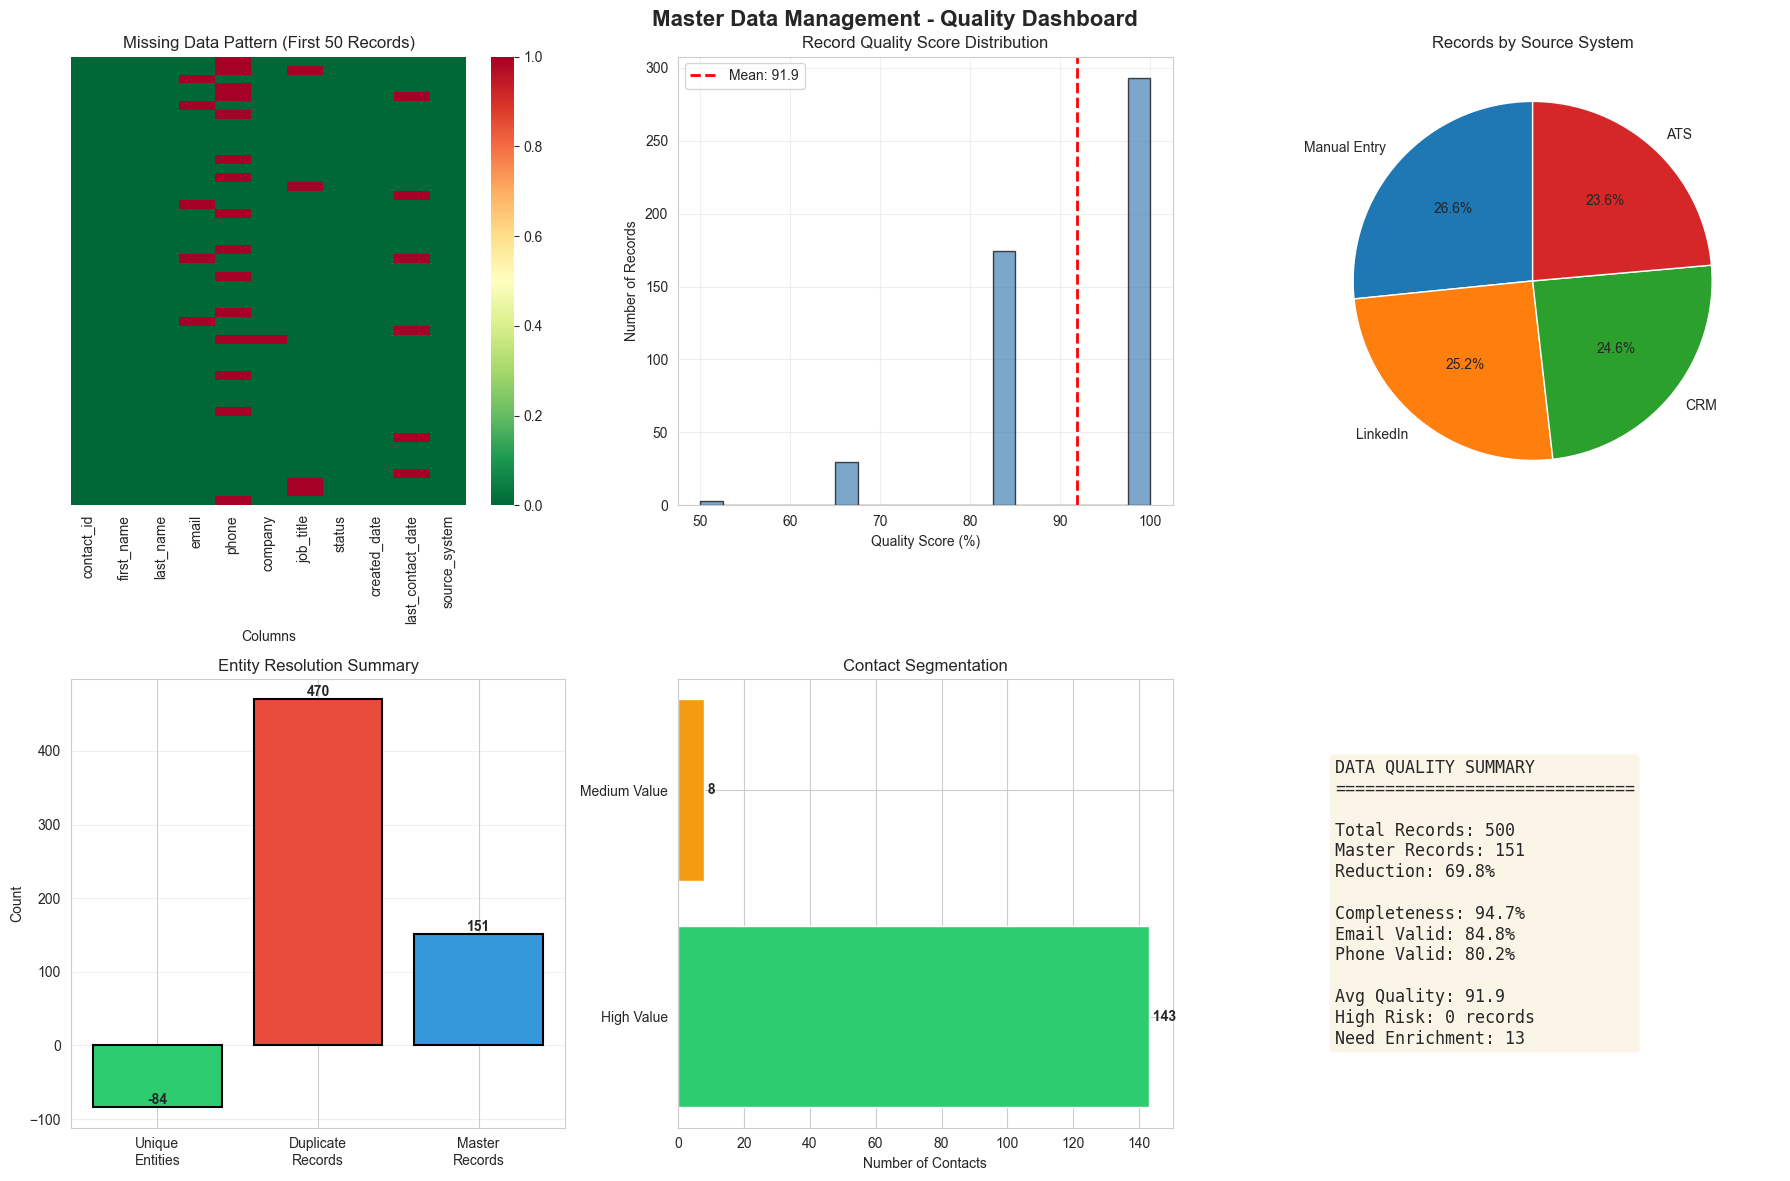

✓ Visualizations generated successfully



In [9]:
# ============================================================================
# 8. VISUALIZATIONS
# ============================================================================
print("\n" + "=" * 80)
print("SECTION 8: DATA QUALITY VISUALIZATIONS")
print("-" * 80)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Master Data Management - Quality Dashboard', fontsize=16, fontweight='bold')

# 1. Missing Data Heatmap
ax1 = axes[0, 0]
missing_matrix = df_raw.isnull().astype(int)
sns.heatmap(missing_matrix.iloc[:50], cbar=True, cmap='RdYlGn_r', ax=ax1, yticklabels=False)
ax1.set_title('Missing Data Pattern (First 50 Records)')
ax1.set_xlabel('Columns')

# 2. Quality Score Distribution
ax2 = axes[0, 1]
ax2.hist(df_quality['quality_score'], bins=20, edgecolor='black', color='steelblue', alpha=0.7)
ax2.axvline(df_quality['quality_score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_quality["quality_score"].mean():.1f}')
ax2.set_title('Record Quality Score Distribution')
ax2.set_xlabel('Quality Score (%)')
ax2.set_ylabel('Number of Records')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Source System Distribution
ax3 = axes[0, 2]
source_counts = df_raw['source_system'].value_counts()
ax3.pie(source_counts.values, labels=source_counts.index, autopct='%1.1f%%', startangle=90)
ax3.set_title('Records by Source System')

# 4. Duplicate Detection Results
ax4 = axes[1, 0]
categories = ['Unique\nEntities', 'Duplicate\nRecords', 'Master\nRecords']
values = [num_unique_entities - (num_duplicates//2), num_duplicates, len(master_records)]
colors = ['#2ecc71', '#e74c3c', '#3498db']
bars = ax4.bar(categories, values, color=colors, edgecolor='black', linewidth=1.5)
ax4.set_title('Entity Resolution Summary')
ax4.set_ylabel('Count')
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

# 5. Segment Distribution
ax5 = axes[1, 1]
segment_counts = df_enriched['segment'].value_counts()
colors_segment = {'High Value': '#2ecc71', 'Medium Value': '#f39c12', 'Low Value': '#e67e22', 'At Risk': '#e74c3c'}
ax5.barh(segment_counts.index, segment_counts.values, color=[colors_segment[x] for x in segment_counts.index])
ax5.set_title('Contact Segmentation')
ax5.set_xlabel('Number of Contacts')
for i, v in enumerate(segment_counts.values):
    ax5.text(v, i, f' {v}', va='center', fontweight='bold')

# 6. Data Quality Metrics
ax6 = axes[1, 2]
ax6.axis('off')
metrics_text = "DATA QUALITY SUMMARY\n" + "="*30 + "\n\n"
metrics_text += f"Total Records: {len(df_raw)}\n"
metrics_text += f"Master Records: {len(master_records)}\n"
metrics_text += f"Reduction: {(1 - len(master_records)/len(df_raw))*100:.1f}%\n\n"
metrics_text += f"Completeness: {completeness_score:.1f}%\n"
metrics_text += f"Email Valid: {df_quality['email_valid'].sum()/len(df_quality)*100:.1f}%\n"
metrics_text += f"Phone Valid: {df_quality['phone_valid'].sum()/len(df_quality)*100:.1f}%\n\n"
metrics_text += f"Avg Quality: {df_quality['quality_score'].mean():.1f}\n"
metrics_text += f"High Risk: {len(high_risk)} records\n"
metrics_text += f"Need Enrichment: {df_enriched['requires_enrichment'].sum()}"
ax6.text(0.1, 0.5, metrics_text, fontsize=12, verticalalignment='center',
         fontfamily='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()

print("✓ Visualizations generated successfully")
print()



In [10]:
# ============================================================================
# 9. RECOMMENDATIONS & ACTION ITEMS
# ============================================================================
print("\n" + "=" * 80)
print("SECTION 9: RECOMMENDATIONS & ACTION ITEMS")
print("-" * 80)


print("IMMEDIATE ACTIONS:")
print("  1. Address {0} high-risk records with quality score < 50%".format(len(high_risk)))
print("  2. Enrich {0} records missing critical contact information".format(df_enriched['requires_enrichment'].sum()))
print("  3. Investigate {0} duplicate groups for manual review".format(len(duplicate_groups)//2))
print()

print("DATA GOVERNANCE INITIATIVES:")
print("  • Implement email validation at point of entry")
print("  • Establish standardization rules for phone numbers")
print("  • Define source system hierarchy for survivorship rules")
print("  • Create automated alerts for duplicate detection")
print("  • Schedule weekly data quality monitoring reports")
print()

print("BUSINESS VALUE:")
estimated_hours_saved = (num_duplicates * 5) / 60  # 5 min per duplicate
print(f"  • Estimated time saved: {estimated_hours_saved:.1f} hours/month from deduplication")
print(f"  • Improved contact reachability: {df_quality['email_valid'].sum()/len(df_quality)*100:.1f}% valid emails")
print(f"  • Enhanced targeting: {len(df_enriched[df_enriched['segment']=='High Value'])} high-value contacts identified")
print()




SECTION 9: RECOMMENDATIONS & ACTION ITEMS
--------------------------------------------------------------------------------
IMMEDIATE ACTIONS:
  1. Address 0 high-risk records with quality score < 50%
  2. Enrich 13 records missing critical contact information
  3. Investigate 235 duplicate groups for manual review

DATA GOVERNANCE INITIATIVES:
  • Implement email validation at point of entry
  • Establish standardization rules for phone numbers
  • Define source system hierarchy for survivorship rules
  • Create automated alerts for duplicate detection
  • Schedule weekly data quality monitoring reports

BUSINESS VALUE:
  • Estimated time saved: 39.2 hours/month from deduplication
  • Improved contact reachability: 84.8% valid emails
  • Enhanced targeting: 143 high-value contacts identified



In [11]:
# ============================================================================
# 10. EXPORT MASTER DATA
# ============================================================================
print("\n" + "=" * 80)
print("SECTION 10: MASTER DATA EXPORT")
print("-" * 80)

# Prepare final master dataset
final_master_data = df_enriched[[
    'master_id', 'first_name', 'last_name', 'email', 'phone', 
    'company', 'job_title', 'status', 'segment', 'engagement_score',
    'confidence_score', 'source_systems', 'source_record_count',
    'requires_enrichment', 'created_date', 'last_contact_date'
]]

print("Master Data Ready for Export:")
print(f"  • Records: {len(final_master_data)}")
print(f"  • Columns: {len(final_master_data.columns)}")
print(f"  • High Confidence Records (>80): {len(final_master_data[final_master_data['confidence_score']>80])}")
print()

# Save to CSV (commented out for demo)
# final_master_data.to_csv('master_contact_data.csv', index=False)
# print("✓ Master data exported to 'master_contact_data.csv'")

print("=" * 80)
print("ANALYSIS COMPLETE")
print("=" * 80)
print()
print("This analysis demonstrates:")
print("  ✓ Data profiling and quality assessment")
print("  ✓ Duplicate detection and entity resolution")
print("  ✓ Golden record creation with survivorship rules")
print("  ✓ Data enrichment and segmentation")
print("  ✓ KPI tracking and visualization")
print("  ✓ Actionable recommendations for MDM improvement")
print()



SECTION 10: MASTER DATA EXPORT
--------------------------------------------------------------------------------
Master Data Ready for Export:
  • Records: 151
  • Columns: 16
  • High Confidence Records (>80): 151

ANALYSIS COMPLETE

This analysis demonstrates:
  ✓ Data profiling and quality assessment
  ✓ Duplicate detection and entity resolution
  ✓ Golden record creation with survivorship rules
  ✓ Data enrichment and segmentation
  ✓ KPI tracking and visualization
  ✓ Actionable recommendations for MDM improvement

